# Support Vector Machines

## Linear SVM classification

Stel dat we een model hebben dat met een lineair model (op plots dus een lijn) een dataset kan scheiden. De code hieronder genereert een aantal zulke lineaire classifiers. Deze datasets zijn in de praktijk zeldzaam, maar veel data kan via aan truc wel worden omgezet naar een lineair model. Daar komen we later in dit document op terug.

In [12]:
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

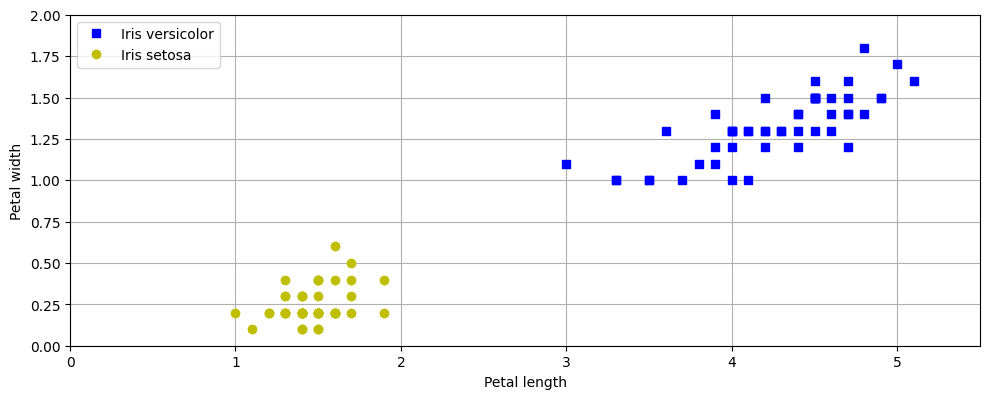

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=10**9) #Waarom zo hoog? --> 
svm_clf.fit(X, y)

# voorbeelden van minder goede modellen
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# deze functie gaan we een aantal keer hergebruiken
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # hieronder wordt op basis van het SVM model het scheidingsvlak gemaakt
    # Op de beslissingsgrens = decision boundary: w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=1, figsize=(10, 8), sharey=True)

plt.sca(axes)
#plt.plot(x0, pred_1, "g--", linewidth=2)
#plt.plot(x0, pred_2, "m-", linewidth=2)
#plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("start_problem_plot")
plt.show()

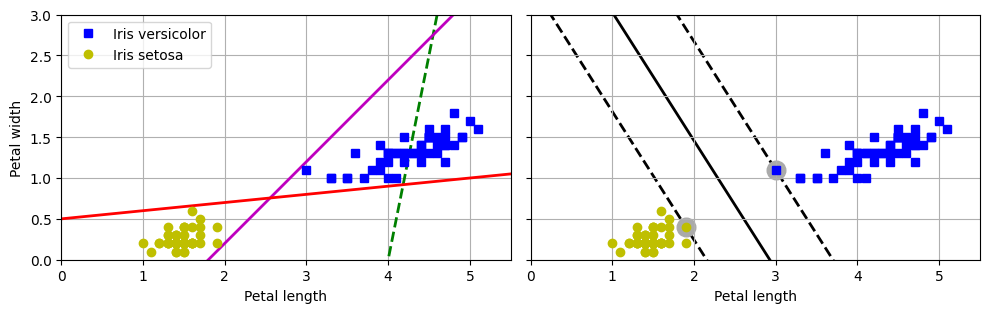

In [14]:
# extra code voor plot - ter illustratie
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 8), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 3])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 3])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()

De paarse en rode lijnen zijn beide manieren om deze dataset volledig correct te scheiden. We noemen deze dataset dan ook *lineair separabel*. De groene gestreepte lijn is een voorbeeld van hoe het niet werkt. Rechts zien we een zwarte lijn en 2 parallelle gestreepte lijnen. Deze zwarte lijn is veel robuuster dan de andere oplossingen: als er bij de paarse oplossing een geel datapunt komt met coordinaten (2.3 ; 0.5), dan wordt dit bij de iris versicolor gerekend. Nochtans lijkt ze visueel veel nabijer bij de Iris setosa.

Bij de rechtse verdeling is een kleine afwijking nog steeds binnen dezelfde categorie -> exact het gedrag dat we willen voor een nieuwe predictie! Dit is het idee van de SVM classifier: het is de (lineaire) scheiding van de klasses op de breedst mogelijke manier (we spreken over *large margin classification*).

De randen van de 'straat' worden bepaald door datapunten net daarop. Datapunten toevoegen ver weg van de grens veranderen niets aan deze grens. het zijn de randpunten die de steunpunten vormen van de straat: dit noemen we de *supports*.

## Soft margin classification
Soms is de data zodanig dat een deze niet lineair separabel is. Op de meeste data zit ruis, dus voor de volgende data kunnen we geen oplossing vinden of zorgt vreemd punt voor support die heel dicht bij de andere punten ligt:

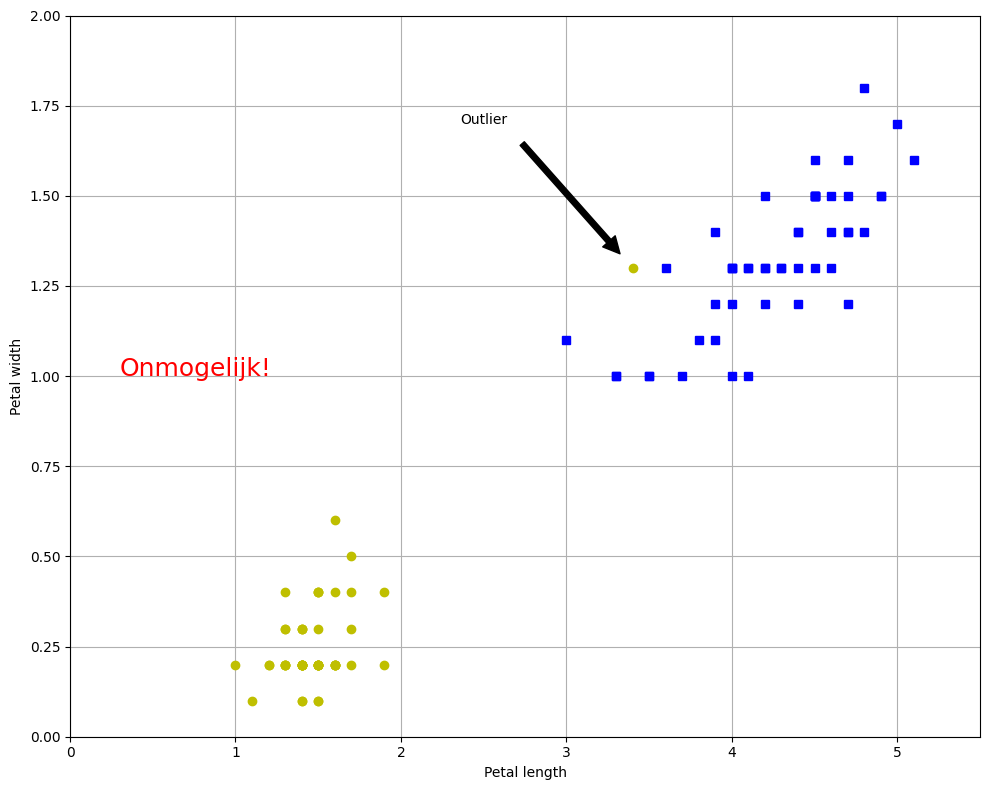

In [15]:
# extra code – dit genereert de plot hieronder

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=1, figsize=(10, 8), sharey=True)

plt.sca(axes)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Onmogelijk!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()

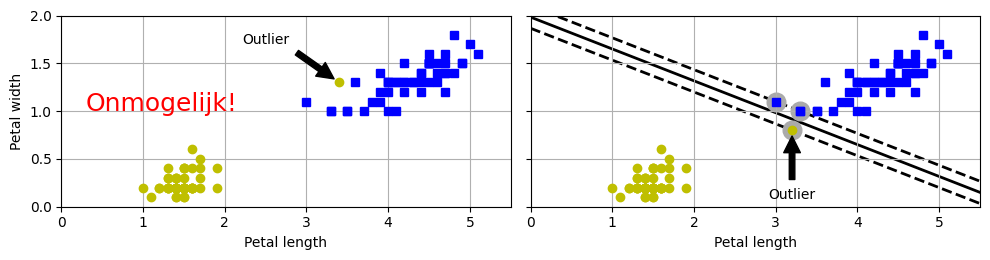

In [16]:
# extra code – voor plot hieronder

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Onmogelijk!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()

Als oplossing moet je je model iets flexibeler maken: we zoeken een balans tussen:
- een zo breed mogelijke marge
- zo weinig mogelijk 'overtredingen': objecten die aan de foute kant van de lijn staan
Dit noemen we *soft margin classificatie*. 

De parameter *C* die we meegeven bij de creatie van een SVM, houdt dit in balans: 
- Hoge C: voorkeur voor brede straat
- Lage C: voorkeur voor minder overtredingen

Je kan hieronder experimenteren met waardes van C en het resultaat bekijken. C noemen we een *regularizatie parameter*. Een hoge C geeft een simpeler model (wat mogelijk gaat onderfitten)

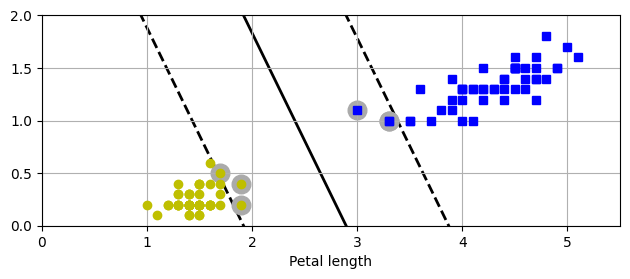

In [17]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=0.25)
svm_clf.fit(X, y)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("soft_margin_classification_plot")
plt.show()

De code hieronder neemt een aantal C-waardes en plot de figuurtjes mooi onder elkaar:

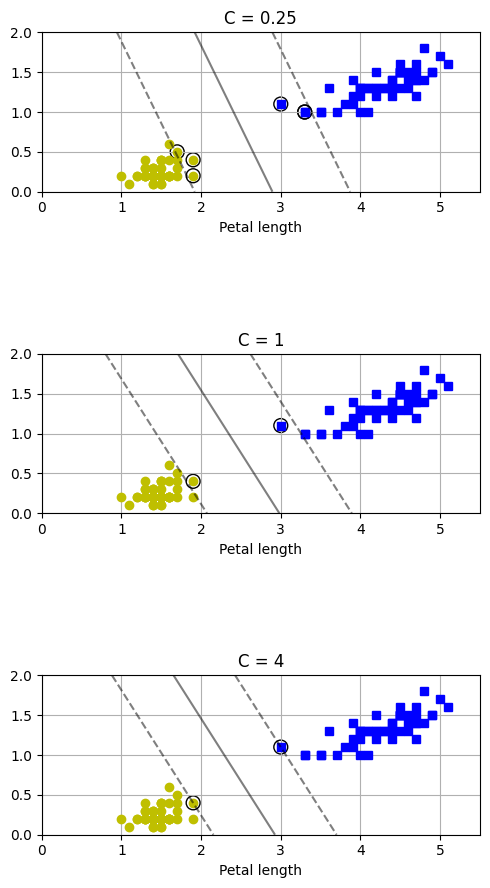

In [18]:
import matplotlib.pyplot as plt
#import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()

#X = iris.data[["petal length (cm)", "petal width (cm)"]].values
X = iris.data[:, [2, 3]]
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor] # slicing in pandas
y = y[setosa_or_versicolor]

# Define different values of C
C_values = [0.25, 1, 4]

# Create subplots for each value of C
plt.figure(figsize=(5, 10))

for i, C in enumerate(C_values, 1):
    plt.subplot(3, 1, i)

    # SVM Classifier model
    svm_clf = SVC(kernel="linear", C=C)
    svm_clf.fit(X, y)

    # Plot decision boundary
    plt.title(f"C = {C}")
    plt.xlabel("Petal length")
    plt.axis([0, 5.5, 0, 2])
    plt.gca().set_aspect("equal")
    plt.grid()

    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")

    # Plot support vectors
    plt.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k')
    
    # Plot decision boundary
    XX, YY = np.meshgrid(np.linspace(0, 5.5, 100), np.linspace(0, 2, 100))
    Z = svm_clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.tight_layout()
plt.show()


Hoe moet je de ideale C vinden ? Gebruik Randomized grid search: je geeft een aantal waardes van C aan die je wil laten testen (en eventueel andere hyperparameters), en dan zal de GridSearchCV op zoek gaan naar de beste optie. 

In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split
param_grid = {'C': [0.001, 0.01, 0.1, 1,10,100]} #over deze parameters wordt er gezocht

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # beperken tot de features 'petal length' en 'petal width'
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1) #beperken tot de eerste 2 soorten bloemen, soort 3 even buiten beschouwing laten
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_clf = SVC(kernel="linear")

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='neg_mean_squared_error')

In [20]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [21]:
grid_search.best_estimator_

SVC(C=0.01, kernel='linear')

## Non-lineaire data
In de praktijk zijn bijna alle datasets non-lineair. Wat moeten we dan doen? We kijken naar een concrete dataset die wel wat structuur heeft, maar duidelijk niet lineair is.

In [22]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC

In [23]:

X, y = make_moons(n_samples = 100, noise=0.15)
polynomial_svm_clf = Pipeline([
    #("poly_features", PolynomialFeatures(degree=3)), #comment en uncomment voor meer detail
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=1, loss='hinge')) # C is een hyperparameter
])

polynomial_svm_clf.fit(X,y)

/home/jurrean/miniconda3/envs/ml_algorithms_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, loss='hinge'))])

In [24]:
# een plot maken
import numpy as np
import matplotlib.pyplot as plt

def plot_boundary(model, X, y):
    # de code hieronder kan handig zijn om te hergebruiken

    # Stap 1: een meshgrid van punten
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    # xx en yy zijn typisch 2 dimensionale arrays

    # Stap 2: Gebruik de getrainde classifier om labels van punten te voorspellen
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel is een methode om een 2d data om te zetten in een 1d lange array, door de rijen achter elkaar te plaatsen
    Z = Z.reshape(xx.shape) # hierna wordt de voorspelling op die lange rij terug in matrixvorm gezet

    # Stap 3: Plot the decision boundary en data punten
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

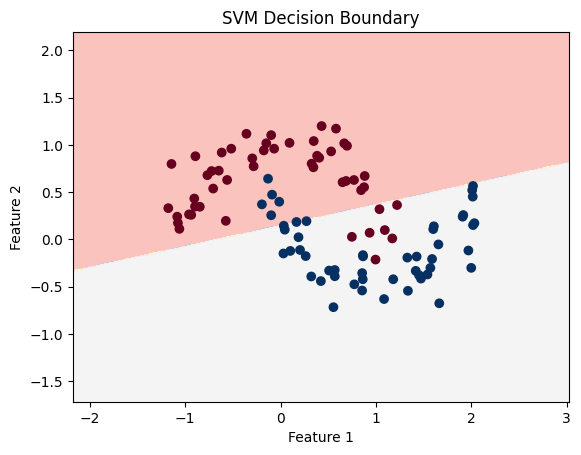

In [25]:
plot_boundary(polynomial_svm_clf, X,y)

Bij een lineair model werkt de grens niet goed. Als je de polynomial features lijn in de pipeline opzet, dan worden er veeltermen tot een bepaalde graad toegevoegd. Dit zorgt dat er meer afhankelijke variabelen zijn, maar deze laten een gekromde curve toe. Experimenteer met 2de of 3de graads features. denk aan het risico op overfitting.

### Polynomial features
Het is mogelijk om hetzelfde resultaat te krijgen zonder de extra features effectief toe te voegen. Dit is belangrijk omdat er dus geen hoog aantal extra features moeten worden toegevoegd. In de implementatie zie je op het eerste zicht, behalve dat een parameter verschuift, weinig verschil:

In [26]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC

X, y = make_moons(n_samples = 100, noise=0.15)
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='poly', degree = 3, C=5, coef0=1)) # meer hyperparameters: coef0 bepaalt hoe hatrd het model luistert naar hoge orde polynomials
])

poly_kernel_svm_clf.fit(X,y) #

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

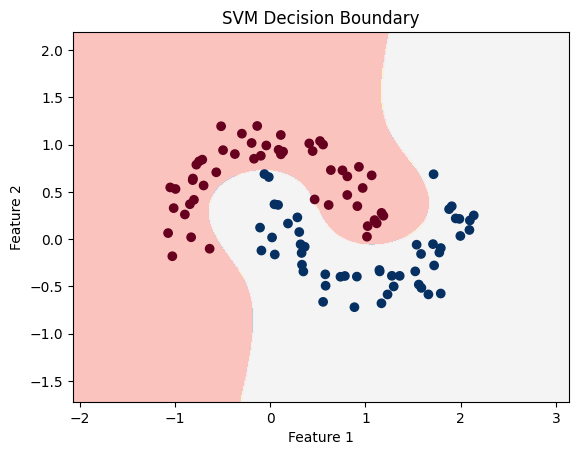

In [27]:
plot_boundary(poly_kernel_svm_clf, X,y)

Achterliggend is er echter wel iets interessant gebeurt (Kernel trick), waardoor deze optie in het algemeen efficiënter is. Eigenlijk heeft de classifier zelf een aantal extra kenmerken toegevoegd om de dataset goed te kunnen classificeren. Je kunt dit inbeelden alsof de classifier van een 2D probleem dataset een dataset heeft gemaakt met meer dimensies, waardoor deze makkelijker te scheiden is. In het ideale geval zou je een functie hebben die de stukken van 1 soort en de stukken van een andere soort op een andere hoogte zet, zoals in de geïdealiseerde grafiek hieronder:

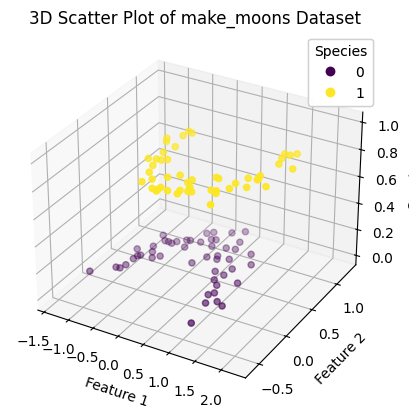

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from mpl_toolkits.mplot3d import Axes3D

# Generate the make_moons dataset
X, y = make_moons(n_samples=100, noise=0.15)

# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D with color-coded labels
scatter = ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', marker='o')

# Customize the plot
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Species')
ax.set_title('3D Scatter Plot of make_moons Dataset')

# Add a color bar indicating species
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Species")
ax.add_artist(legend)

plt.show()

### Similarity function
Naast polynomen, kan je nog andere functie gebruiken die helpen om een onderscheid te maken tussen punten met extra features. Een typevoorbeeld is een *similarity function*, die aangeeft wanneer twee objecten 'gelijkaardig' zijn.  Een voorbeels is de Gaussian RBF die gecentreerd is rond een punt c:


$$ \phi(\mathbf{x}, \mathbf{c}, \sigma) = \exp\left(-\frac{||\mathbf{x} - \mathbf{c}||^2}{2\sigma^2}\right) $$


Hierbij is $\sigma$ een variable die aanduid hoe breed de functie wordt uitgesmeerd.

Laat ons kijken hoe dit reageert voor ons probleem.

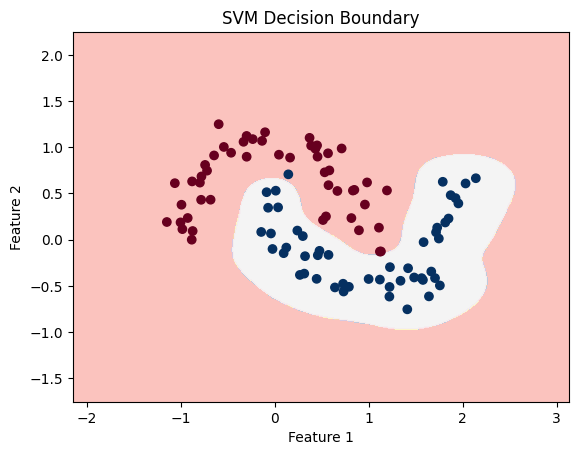

In [29]:
X, y = make_moons(n_samples = 100, noise=0.15)
similarity_svm_clf = Pipeline([
    #("poly_features", PolynomialFeatures(degree=3)), #comment en uncomment voor meer detail
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='rbf', gamma=5, C=0.001)) # C is een hyperparameter
])

similarity_svm_clf.fit(X,y) # op wat voor soort dingen kunnen we.fit en .predict callen ?

plot_boundary(similarity_svm_clf, X,y)


 ### Kernel
Hetgeen we aangepast hebben is in plaats van een lineaire kernel te gebruiken, een 'poly' kernel te gebruiken. Maar wat is nu precies een *kernel*, en hoe helpt dat ons ?

De kenrel parameter bepaalt op welke manier de decision boundary wordt gemodelleerd. Het is een cruciale component waarlangs de punten doormoeten wanneer ze van een lager-dimensionale ruimte naar een hogerdimensioale ruimte worden getransformeerd.
In het prentje hieronder zie je wat je in het ideale geval wil bereiken:

![Doel van een goede kernel](image.png)

Er zijn veel soorten kernels. Het inspecteren van de data kan een idee geven welke kernels mogelijk goed werken, maar je kan ook gewoon verschillende dingen uitproberen om te zien wat het beste werkt. Hieronder de meest voorkomende:
- Linear kernel: het meest basis voorbeeld, het begin van deze les
- Polynomial (poly): mapt de data naar een hogerdimensionale ruimte. De 'degree' parameter heeft aan welke graad. Over het algemeen werkt dit goed voor data die wel een patroon hebben, maar geen rechtlijnig patroon. Hoe meer bochten je nodig hebt, hoe hoger de graad.
- Radial Basis Function (rbf): de gaussische kernel mapt de data naar een oneindig-dimensionale ruimte. Dit is de standaardkeuze als je geen idee hebt hoe de structuur van de data eruitziet.
- Sigmoid Kernel (sigmoid): Dit is een alternatieve functie voor niet-lineaire data.